# Principal Component Analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris_data = pd.read_csv('irisdata.csv',header = None)
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris = np.array(iris_data)

In [4]:
Iris_setosa = np.split(iris,3)[0]
Iris_versicolor = np.split(iris,3)[1]
Iris_virginica = np.split(iris,3)[2]

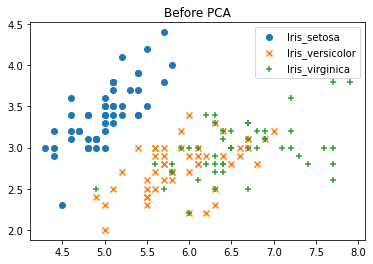

In [5]:
plt.scatter(Iris_setosa[:,0], Iris_setosa[:,1], marker='o', label='Iris_setosa')
plt.scatter(Iris_versicolor[:,0], Iris_versicolor[:,1], marker='x', label='Iris_versicolor')
plt.scatter(Iris_virginica[:,0], Iris_virginica[:,1], marker='+', label='Iris_virginica')
plt.title('Before PCA')
plt.legend()
plt.show()

In [6]:
#Here 5th column is sperated by iris
iris_type = iris[:,-1:]
#Here 1st 4 column form data set
iris = iris[:,:-1]
iris = iris.astype(float)

# STEP 1 : STANDARDIZATION

In [7]:
mean = np.array(iris_data.mean())

In [8]:
standard_deviation = np.std(iris)

In [9]:
x = []
for i in iris:
    x.append((i-mean)/standard_deviation)
    
arrX = np.asarray(x)

# STEP 2 : COVARIANCE MATRIX COMPUTATION

In [10]:
tran_X = arrX.transpose()
covariance_matrix = np.matmul(tran_X, arrX)
print(covariance_matrix)

[[ 26.21932934  -1.50153468  48.70265767  19.76520239]
 [ -1.50153468   7.18883788 -12.30154936  -4.51132772]
 [ 48.70265767 -12.30154936 119.04075946  49.57084976]
 [ 19.76520239  -4.51132772  49.57084976  22.27017251]]


# STEP 3: COMPUTE THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX TO IDENTIFY THE PRINCIPAL COMPONENTS

In [11]:
eig_val_cov, eig_vec_cov = np.linalg.eig(covariance_matrix)

In [12]:
print(eig_val_cov)

[161.54811081   9.26283226   3.0025721    0.90558402]


Here, we take 1st and 2nd column as their maximal amount of variance

In [13]:
Q = eig_vec_cov[:,:2]

In [14]:
a=[]
for i in range(150):
    a.append(np.matmul(Q.T,x[i]))
    
A = np.array(a)

In [15]:
result = np.append(A,iris_type,axis=1)

In [16]:
Iris_setosa = np.split(result,3)[0]
Iris_versicolor = np.split(result,3)[1]
Iris_virginica = np.split(result,3)[2]

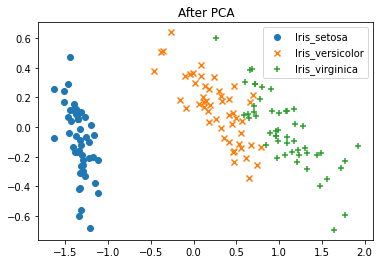

In [17]:
plt.scatter(Iris_setosa[:,0], Iris_setosa[:,1], marker='o', label='Iris_setosa')
plt.scatter(Iris_versicolor[:,0], Iris_versicolor[:,1], marker='x', label='Iris_versicolor')
plt.scatter(Iris_virginica[:,0], Iris_virginica[:,1], marker='+', label='Iris_virginica')
plt.title('After PCA')
plt.legend()
plt.show()